# Neural Networks

### *Instructions:*
- **과제 명세서를 읽어주시고 코드 작성을 해주시길 바랍니다**</span> 
- **명시된 step을 따라가며 전체적인 학습 방법을 숙지합니다**</span>
- (**첫 번째 cell 결과로 나온 시간을 기준으로 채점을 하겠습니다**</span>).

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2026-01-23 00:35:55.865399


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Problem

Mutilayer Perceptron(```class MutiLayerPerceptron```)으로 간단한 Binary classification task를 진행해볼 것입니다. 

> 1. **Dataset**
>> $\texttt{moon}$ dataset
> 2. **Network architecture**

 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = ReLU(H_1)$ where $ReLU$($=\max(0,x)$) is a rectified linear unit and $z_1$ is an output of the first hidden layer.  
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = LeakyReLU(H_2)$ where $LeakyReLU$($=\max(0.01x,x)$) and $z_2$ is an output of the second hidden layer. 
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $z_3 = tanh(H_3 + H_1)$ where $\tanh$ is a tanh function and $z_3$ is an output of the third hidden layer.  
 > $H_4 = z_3 \cdot W_4 + b_4$   
 > $\hat y = \sigma(H_4)$ where $\sigma$ is a sigmoid function unit and $\hat y$ is an output of the network.
 
 > **$W$** and **$b$**는 각각 weights와 bias.    
 > **weight 초기화**: Standard normal ($\texttt{np.random.randn}$. 사용)  
 > **bias 초기화(intercept)**: 0     
 > **Input size**: 2  
 > **The first hidden layer size**: 10  
 > **The second hidden layer size**: 10  
 > **Output size**: 1   
 > **Regularization parameter $\lambda$**: 0.001  
 > **Loss function**: Binary cross entropy loss (or equivently log loss).  
 > **Total loss** : 
 > $L_{total} = \sum_{i=1}^N{ (-y^{(i)}\log \hat{y}^{(i)} -(1-y^{(i)})\log(1-\hat{y}^{(i)})) } +  \lambda \|W\|^2 $   
 > **Optimization**: Gradient descent  
 > **Learning rate** = 0.0001  
 > **Number of epochs** = 50000  
 > $y$는 정답, $\hat{y}$는 예측값이고 0부터 1사이에 존재한다.  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

from mlp import MultiLayerPerceptron
import utils



plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

STEP 1: Load data


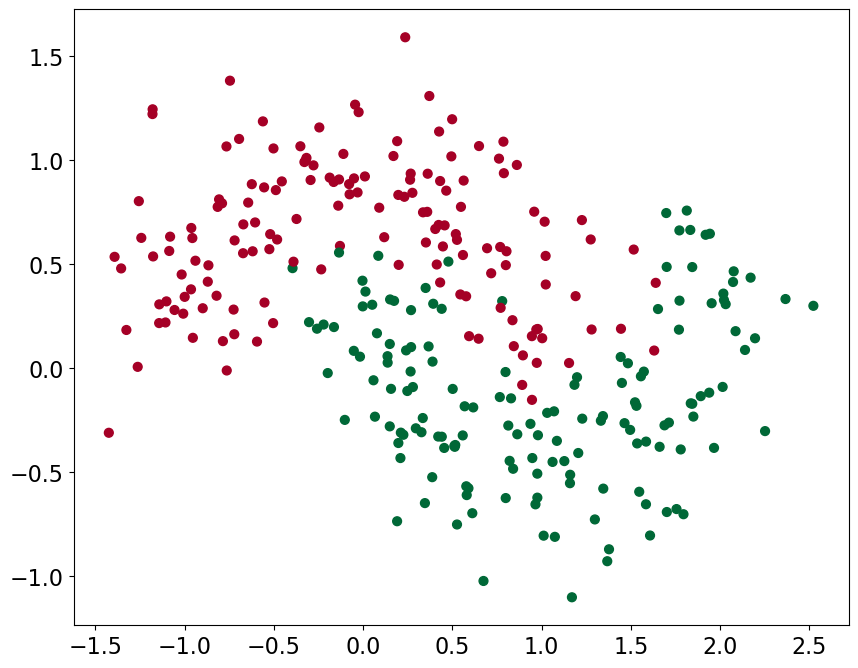

In [4]:
print("STEP 1: Load data")

# Load data
X_train, y_train = sklearn.datasets.make_moons(300, noise = 0.25)

# Visualize data
plt.scatter(X_train[:,0], X_train[:,1], s = 40, c=y_train, cmap=plt.cm.RdYlGn)

In [5]:
print("STEP 2: Train the model")
# random seed
np.random.seed(0)

# Hyperparameters
nn_input_dim = 2
nn_output_dim = 1
nn_hdim1 = 10
nn_hdim2 = 10
nn_hdim3 = 10
lr = 0.0001 
L2_norm = 0.001
epoch = 50000

model = MultiLayerPerceptron(nn_input_dim, nn_hdim1, nn_hdim2, nn_hdim3, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

STEP 2: Train the model
Loss (epoch 1000): 51.64645531240951
Loss (epoch 2000): 35.79599119847722
Loss (epoch 3000): 32.182050081266446
Loss (epoch 4000): 30.690336977119426
Loss (epoch 5000): 29.856697407612945
Loss (epoch 6000): 29.28278493634765
Loss (epoch 7000): 28.835081423082883
Loss (epoch 8000): 28.45639739672579
Loss (epoch 9000): 28.11725550289564
Loss (epoch 10000): 27.80766235142342
Loss (epoch 11000): 27.514493989565775
Loss (epoch 12000): 27.233357174917643
Loss (epoch 13000): 26.954294845325244
Loss (epoch 14000): 26.682374320184646
Loss (epoch 15000): 26.40697054444734
Loss (epoch 16000): 26.132200706158066
Loss (epoch 17000): 25.858473406863702
Loss (epoch 18000): 25.58341754128484
Loss (epoch 19000): 25.29838911990705
Loss (epoch 20000): 25.009892062197583
Loss (epoch 21000): 24.718580788268014
Loss (epoch 22000): 24.441506799448714
Loss (epoch 23000): 24.184098617545427
Loss (epoch 24000): 23.93894276761318
Loss (epoch 25000): 23.714066711731455
Loss (epoch 26000): 

STEP 3: Plot decision boundary


Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

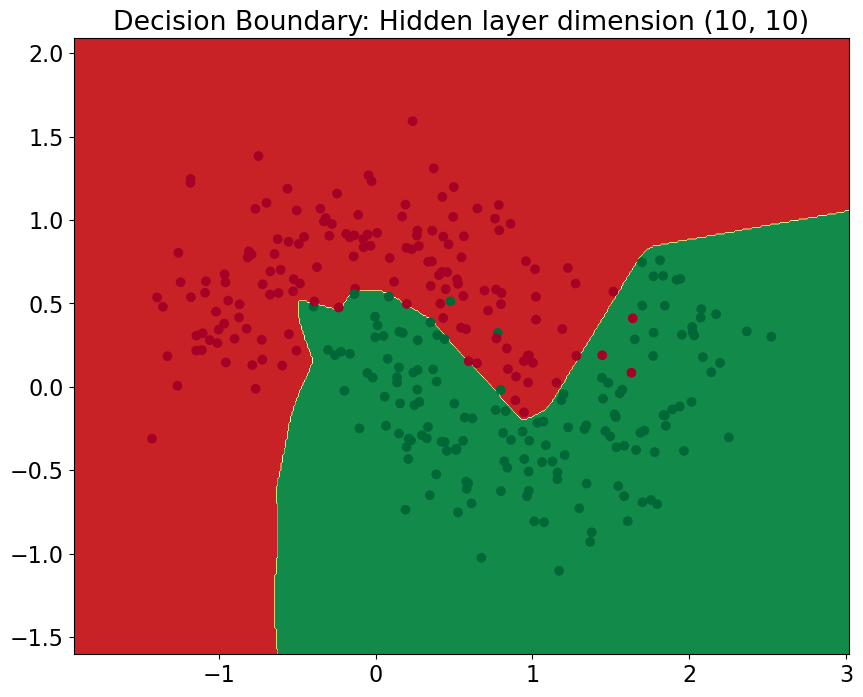

In [6]:
print("STEP 3: Plot decision boundary")
# Plot the decision boundary
utils.plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

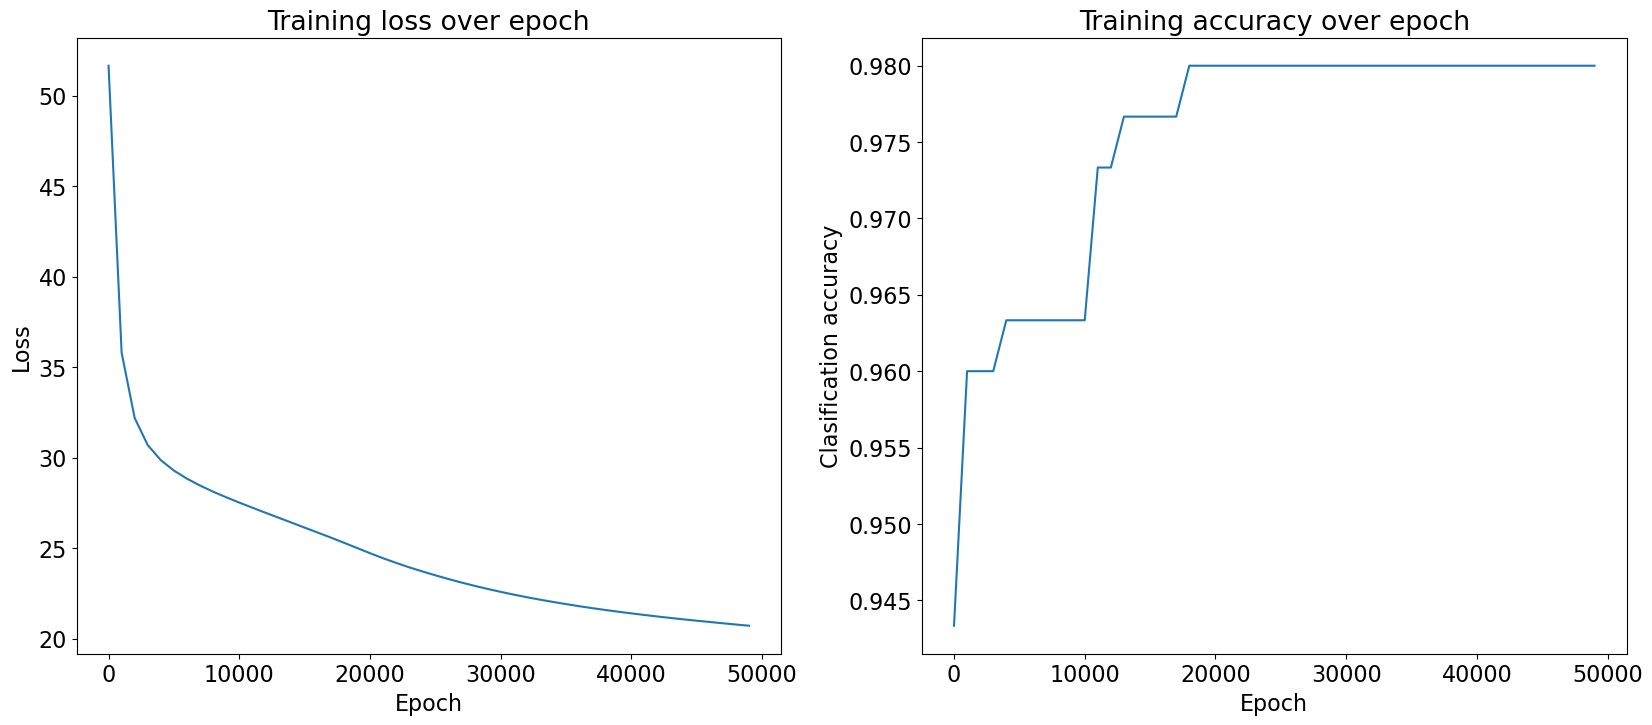

In [7]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)